# Welcome to BOT-MMORPG-AI

### Collection of Data
This is the first part of the series of jupyter notebook of this project.
In this notebook we are going to explorer how to collect the data of our gameplay

First we need to import some libraries and give some definitions

In [14]:
import numpy as np
from grabscreen import grab_screen
import cv2
import time
from getkeys import key_check
from getgamepad import gamepad_check
import os

w = [1,0,0,0,0,0,0,0,0]
s = [0,1,0,0,0,0,0,0,0]
a = [0,0,1,0,0,0,0,0,0]
d = [0,0,0,1,0,0,0,0,0]
wa = [0,0,0,0,1,0,0,0,0]
wd = [0,0,0,0,0,1,0,0,0]
sa = [0,0,0,0,0,0,1,0,0]
sd = [0,0,0,0,0,0,0,1,0]
nk = [0,0,0,0,0,0,0,0,1]


In [15]:
starting_value = 1

while True:
    file_name = 'training_data-{}.npy'.format(starting_value)

    if os.path.isfile(file_name):
        print('File exists, moving along',starting_value)
        starting_value += 1
    else:
        print('File does not exist, starting fresh!',starting_value)
        
        break

File exists, moving along 1
File exists, moving along 2
File exists, moving along 3
File exists, moving along 4
File exists, moving along 5
File exists, moving along 6
File exists, moving along 7
File exists, moving along 8
File exists, moving along 9
File does not exist, starting fresh! 10


In [4]:
def keys_to_output(keys):
    '''
    Convert keys to a ...multi-hot... array
     0  1  2  3  4   5   6   7    8
    [W, S, A, D, WA, WD, SA, SD, NOKEY] boolean values.
    '''
    output = [0,0,0,0,0,0,0,0,0]

    if 'W' in keys and 'A' in keys:
        output = wa
    elif 'W' in keys and 'D' in keys:
        output = wd
    elif 'S' in keys and 'A' in keys:
        output = sa
    elif 'S' in keys and 'D' in keys:
        output = sd
    elif 'W' in keys:
        output = w
    elif 'S' in keys:
        output = s
    elif 'A' in keys:
        output = a
    elif 'D' in keys:
        output = d
    else:
        output = nk
    return output

def gamepad_keys_to_output(lista):
    '''
    Convert list of boolean to values 0 or 1
    ['LT','RT','Lx','Ly','Rx','Ry','UP','DOWN','LEFT','RIGHT','START','SELECT','L3','R3','LB','RB','A','B','X','Y']
    example
    [0, 0, 1792, -2099, 1272, -1997, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
    '''
    output = [int(elem) for elem in lista]
    return output

## grab_screen

In [5]:
# Done by Frannecklp

import cv2
import numpy as np
import win32gui, win32ui, win32con, win32api

def grab_screen(region=None):

    hwin = win32gui.GetDesktopWindow()

    if region:
            left,top,x2,y2 = region
            width = x2 - left + 1
            height = y2 - top + 1
    else:
        width = win32api.GetSystemMetrics(win32con.SM_CXVIRTUALSCREEN)
        height = win32api.GetSystemMetrics(win32con.SM_CYVIRTUALSCREEN)
        left = win32api.GetSystemMetrics(win32con.SM_XVIRTUALSCREEN)
        top = win32api.GetSystemMetrics(win32con.SM_YVIRTUALSCREEN)

    hwindc = win32gui.GetWindowDC(hwin)
    srcdc = win32ui.CreateDCFromHandle(hwindc)
    memdc = srcdc.CreateCompatibleDC()
    bmp = win32ui.CreateBitmap()
    bmp.CreateCompatibleBitmap(srcdc, width, height)
    memdc.SelectObject(bmp)
    memdc.BitBlt((0, 0), (width, height), srcdc, (left, top), win32con.SRCCOPY)
    
    signedIntsArray = bmp.GetBitmapBits(True)
    img = np.fromstring(signedIntsArray, dtype='uint8')
    img.shape = (height,width,4)

    srcdc.DeleteDC()
    memdc.DeleteDC()
    win32gui.ReleaseDC(hwin, hwindc)
    win32gui.DeleteObject(bmp.GetHandle())

    return cv2.cvtColor(img, cv2.COLOR_BGRA2RGB)

# Analsis of Image Reading

### Simple image

In [186]:
image = cv2.imread('image.png')
cv2.imshow("test", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### COLOR_BGR2GRAY

In [94]:
# Python program to explain cv2.cvtColor() method
# importing cv2
import cv2
# path
path = 'image.png'
# Reading an image in default mode
src = cv2.imread(path)
# Window name in which image is displayed
window_name = 'Image'
# Using cv2.cvtColor() method
# Using cv2.COLOR_BGR2GRAY color space
# conversion code
image = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY )


In [187]:
image

array([[[ 45,  38,  18],
        [ 41,  33,  15],
        [ 44,  36,  17],
        ...,
        [ 45,  65, 100],
        [ 44,  64, 100],
        [ 44,  64, 101]],

       [[ 53,  49,  19],
        [ 46,  39,  18],
        [ 43,  35,  17],
        ...,
        [ 40,  65, 111],
        [ 38,  63, 109],
        [ 37,  62, 107]],

       [[ 41,  33,  15],
        [ 43,  36,  17],
        [ 43,  35,  17],
        ...,
        [ 43,  46,  72],
        [ 41,  44,  71],
        [ 41,  44,  70]],

       ...,

       [[175, 123,  56],
        [175, 123,  56],
        [175, 123,  56],
        ...,
        [216, 150,  71],
        [216, 150,  71],
        [214, 150,  70]],

       [[175, 123,  57],
        [175, 124,  56],
        [175, 124,  57],
        ...,
        [216, 150,  71],
        [216, 150,  72],
        [216, 150,  71]],

       [[175, 123,  57],
        [175, 123,  55],
        [175, 123,  56],
        ...,
        [216, 152,  72],
        [216, 152,  72],
        [216, 150,  72]]

In [188]:
# Displaying the image
cv2.imshow(window_name, image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### COLOR_BGRA2RGB

In [77]:
image = cv2.imread('image.png',cv2.COLOR_BGRA2RGB)
cv2.imshow("test", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Due to we are going to use for the moment jupyter notebook let us consider inline images

## Inline image show

In [226]:
import io
import cv2
import numpy as np
from IPython.display import clear_output, Image, display
import PIL.Image
def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 255))
    f = io.BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

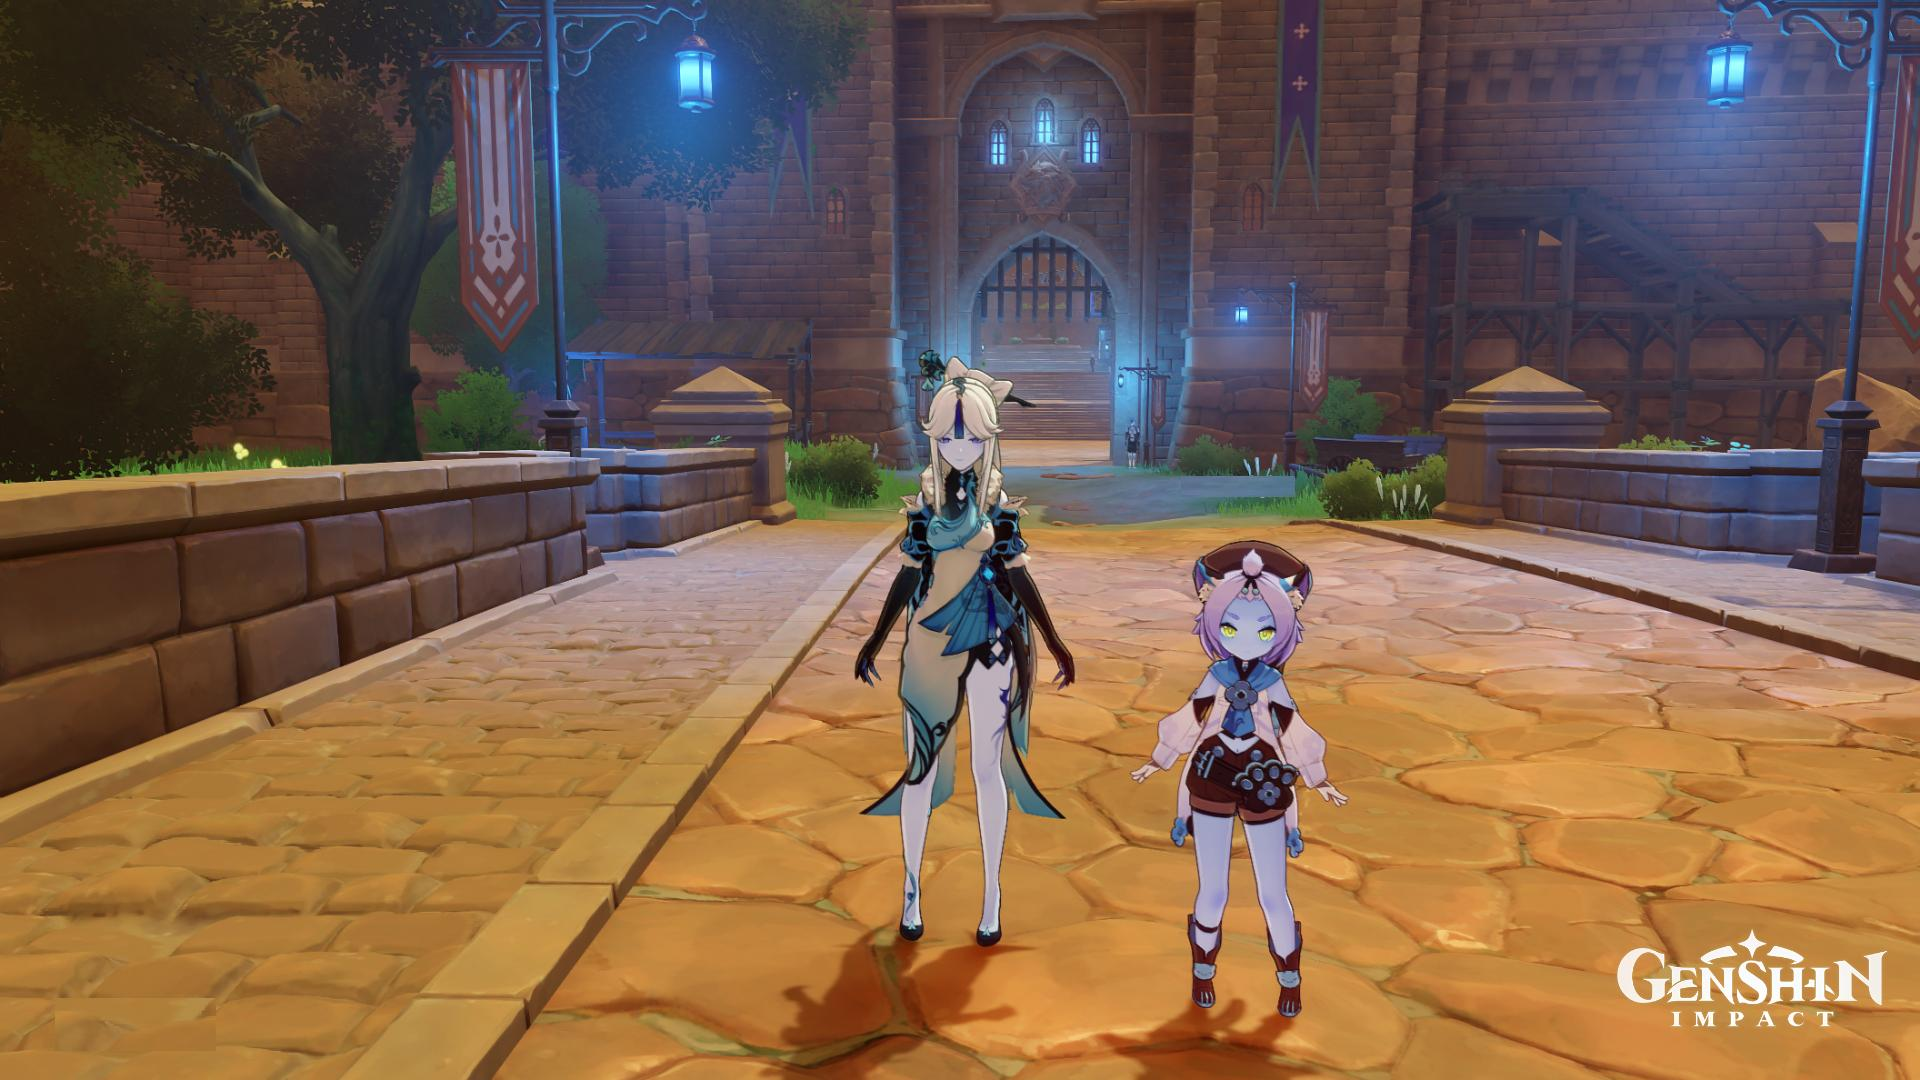

In [227]:
img = cv2.imread("image.png") 
showarray(img)

Let us analize this image

If we check it is a numpy.ndarray

In [228]:
type(img)

numpy.ndarray

which is a simply matrices

Let us analize NumPy: Get the number of dimensions, shape, and size of ndarray

To get the number of dimensions, shape (length of each dimension) and size (number of all elements) of NumPy array, use attributes ndim, shape, and size of numpy.ndarray. The built-in function len() returns the size of the first dimension.

- Number of dimensions of numpy.ndarray: ndim
- Shape of numpy.ndarray: shape
- Size of numpy.ndarray (total number of elements): size
- Size of the first dimension of numpy.ndarray: len()

## Number of dimensions of numpy.ndarray: ndim

In [229]:
print(img.ndim)

3


## Shape of numpy.ndarray: shape

In [230]:
print(img.shape)

(1080, 1920, 3)


For example, in the case of a two-dimensional array, it will be (number of rows, number of columns). If you only want to get either the number of rows or the number of columns, you can get each element of the tuple.

In [231]:
print(img.shape[0])

1080


In [232]:
print(img.shape[1])

1920


In [233]:
print(img.shape[2])

3


## Size of the first dimension of numpy.ndarray: len()

In [234]:
print(len(img))

1080


It is also possible to assign to different variables. Unpack a tuple / list in Python

### How to extract red, green, blue color from an image in python?

How do I change the color of an image in OpenCV?,Green channel extraction in image processing python,In Python OpenCV Tutorial, Explained How to Conver Color or Gray Image into Blue Green Red image using OpenCV Python.


In [235]:
# # Convert RGB(color) image into Blue, Green, Red
# In[1]
# Show image
import cv2
import numpy as np


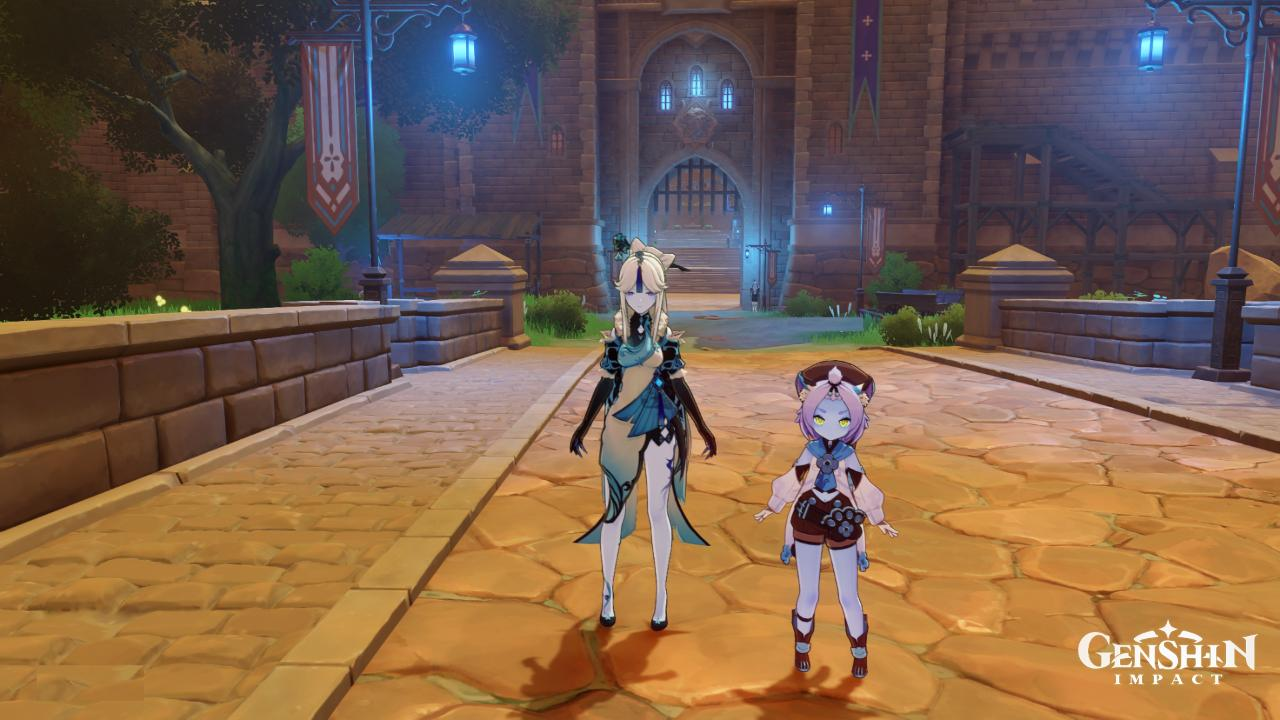

In [236]:
img_path = "image.png"
img = cv2.imread(img_path)
img = cv2.resize(img, (1280, 720))
#cv2.imshow("Color Image", img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
showarray(img)

In [237]:
img.shape

(720, 1280, 3)

In [238]:
b, g, r = cv2.split(img)

In [239]:
print(b.ndim)

2


In [240]:
# # Blue Image
zeros_ch = np.zeros(img.shape[0: 2], dtype = "uint8")

In [241]:
zeros_ch.ndim

2

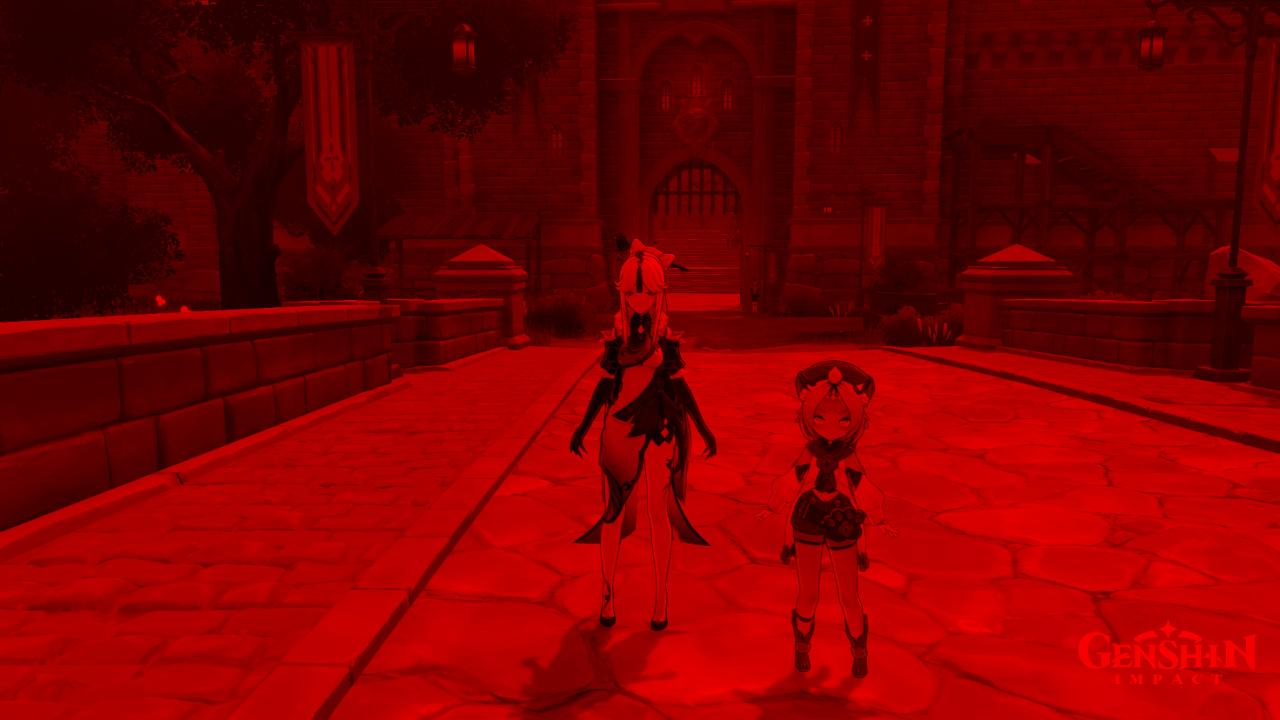

In [242]:
blue_img = cv2.merge([b, zeros_ch, zeros_ch])
#cv2.imshow("Blue Image", blue_img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
showarray(blue_img)

In [243]:
blue_img.ndim

3

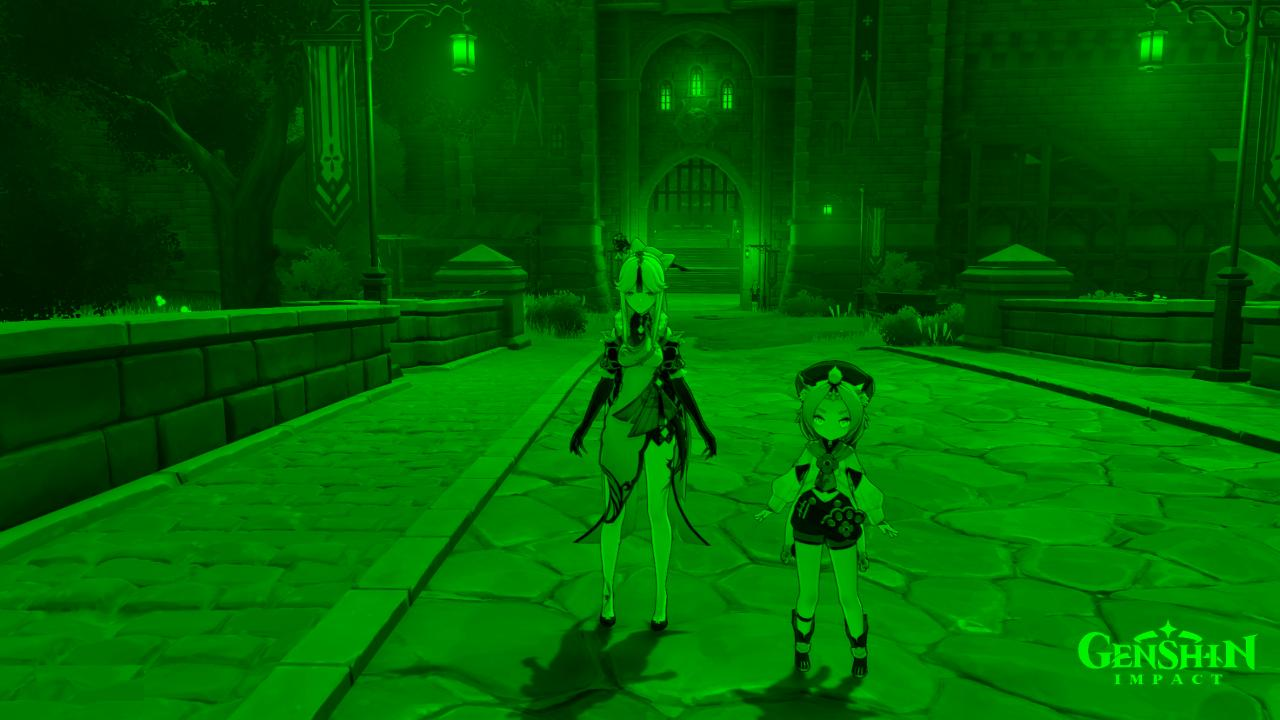

In [244]:
# # Green Image
green_img = cv2.merge([zeros_ch, g, zeros_ch])
#cv2.imshow("Green Image", green_img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
showarray(green_img)

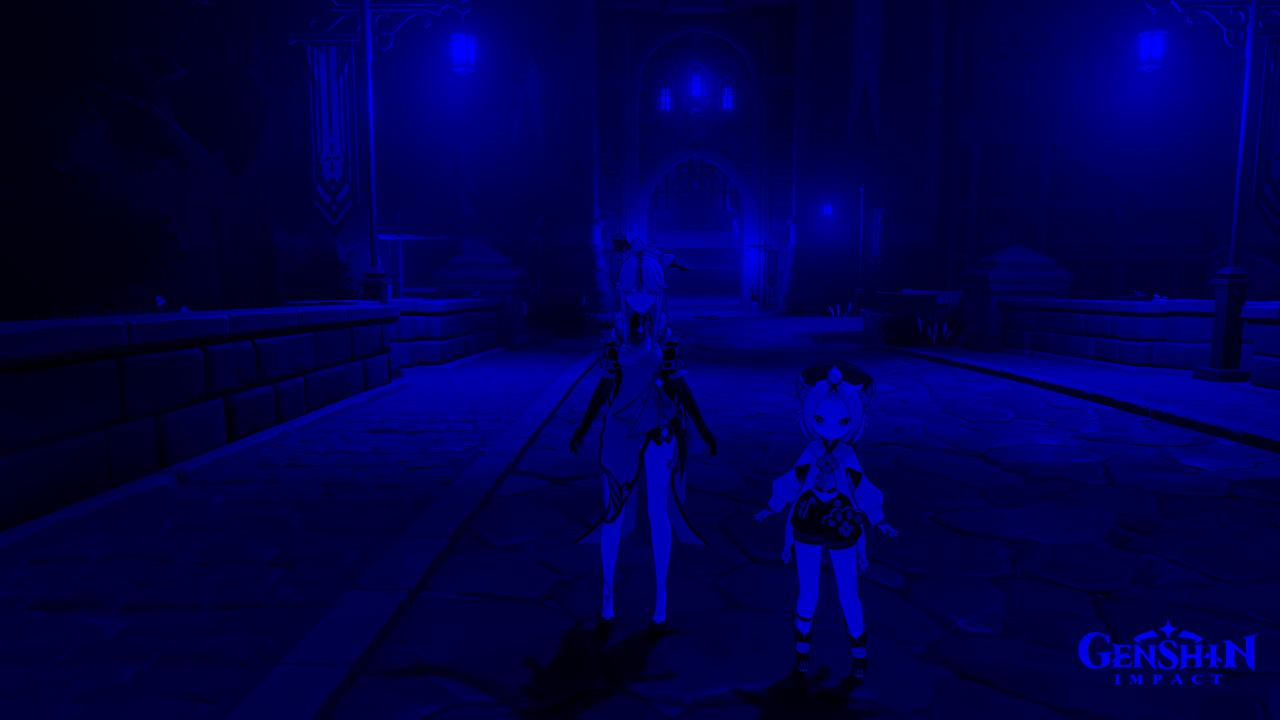

In [245]:
# # Red Image
red_img = cv2.merge([zeros_ch, zeros_ch, r])
#cv2.imshow("Red Image", red_img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
showarray(red_img)

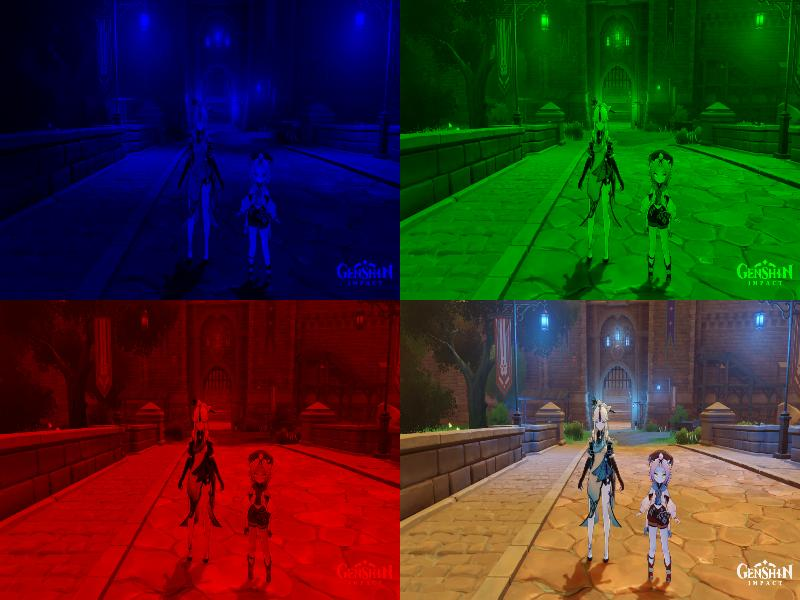

In [246]:
# # Show Image using Index spliting and 4 image in One Window
img = cv2.resize(img, (400, 300))
red_array = np.zeros(img.shape, dtype = "uint8")
red_array[: ,: , 2] = img[: ,: , 2]
green_array = np.zeros(img.shape, dtype = "uint8")
green_array[: ,: , 1] = img[: ,: , 1]
blue_array = np.zeros(img.shape, dtype = "uint8")
blue_array[: ,: , 0] = img[: ,: , 0]
ht1 = np.hstack((red_array, green_array))
ht2 = np.hstack((blue_array, img))
img_4 = np.vstack((ht1, ht2))

#cv2.imshow("4 images", img_4)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
showarray(img_4)

# Analisis Image Capture

In [252]:
# record screen
screen = grab_screen(region=(0,40,1920,1120))

In [253]:
#cv2.imshow("test", screen)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [254]:
#from io import StringIO ## for Python 3

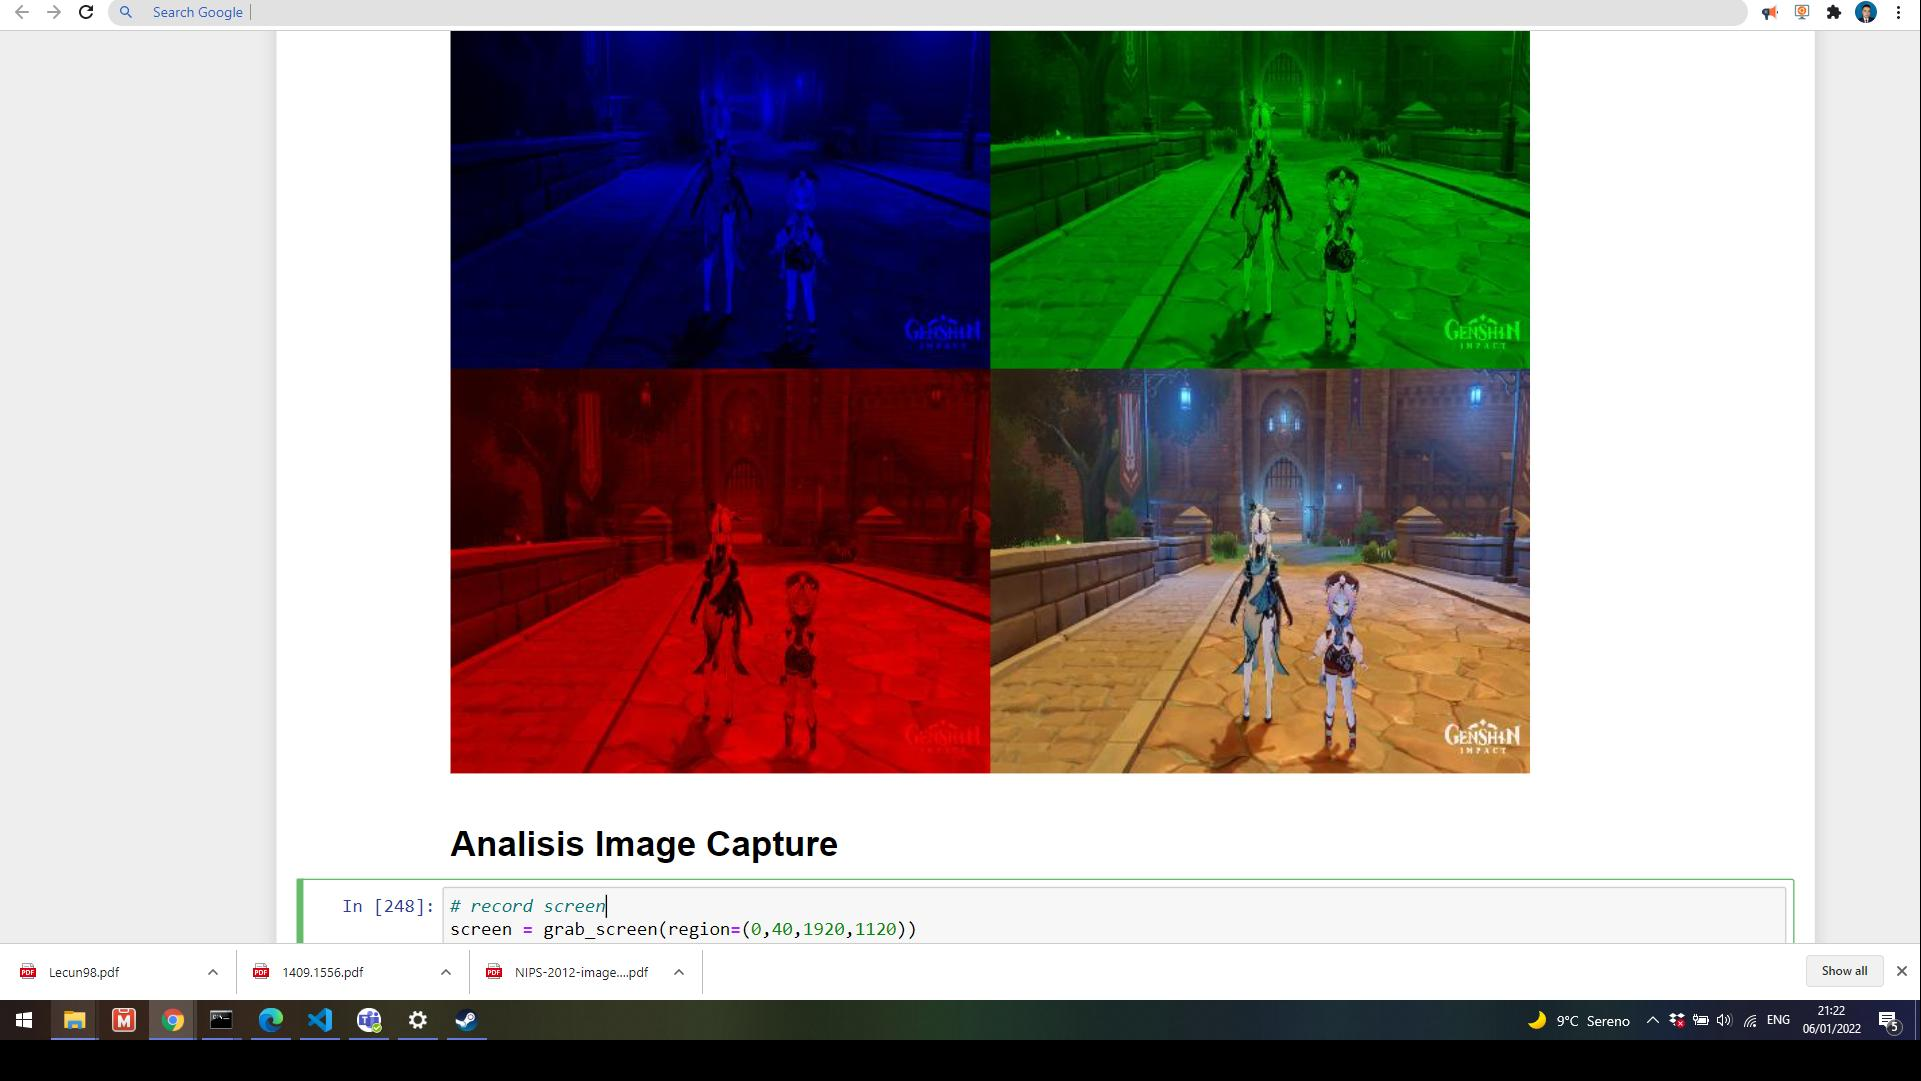

In [255]:
showarray(screen)

In [256]:
type(screen)

numpy.ndarray

In [257]:
#screen

In [258]:
import pandas as pd

In [259]:
# resize to something a bit more acceptable for a CNN
screen = cv2.resize(screen, (480,270))

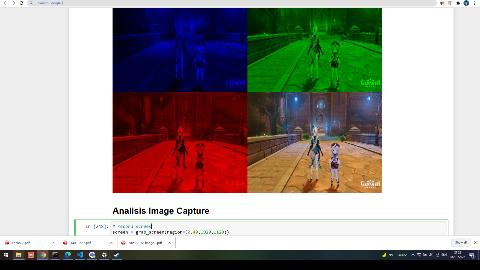

In [260]:
showarray(screen)

In [261]:
type(screen)

numpy.ndarray

In [262]:
# run a color convert:
screen = cv2.cvtColor(screen, cv2.COLOR_BGR2RGB)

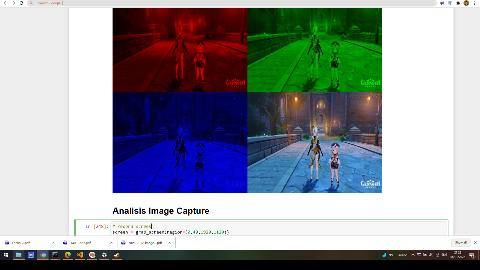

In [263]:
showarray(screen)

In [264]:
type(screen)

numpy.ndarray

Before continue with our exploration, we should ask , 
- What type of neural network we want to develop?
- What we want to identify or recognize?

Depending of the game we should perform add some filters.

For te game of Genshin Impact let us focus into the characters recognition

https://ruslanmv.com/blog/Self-Driving-Car-with-Neural-Networks

# Image Filters Analisis

In [1]:
!pip install numpy==1.17

In [2]:
import matplotlib.pyplot as plt


In [3]:
#!pip install imgaug

In [4]:
from imgaug import augmenters as iaa

In [9]:
def zoom(image):
  zoom = iaa.Affine(scale=(1, 1.3))
  image = zoom.augment_image(image)
  return image


In [10]:
#image = image_paths[random.randint(0, 1000)]

In [11]:
original_image = cv2.imread("image.png") 

In [12]:
#original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)

Text(0.5, 1.0, 'Zoomed Image')

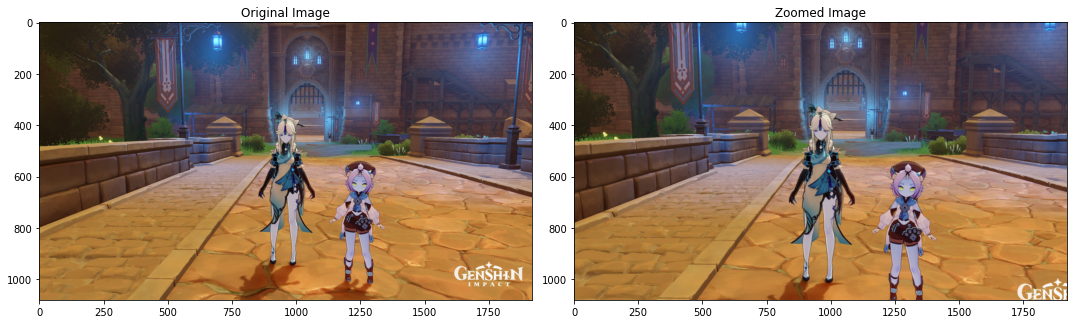

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')

In [14]:
def pan(image):
  pan = iaa.Affine(translate_percent= {"x" : (-0.1, 0.1), "y": (-0.1, 0.1)})
  image = pan.augment_image(image)
  return image

In [15]:
original_image = cv2.imread("image.png") 
panned_image = pan(original_image)

Text(0.5, 1.0, 'Panned Image')

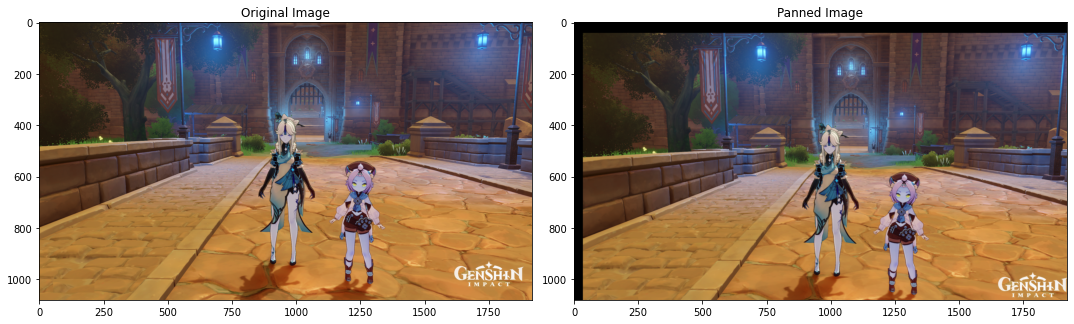

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
 
axs[1].imshow(panned_image)
axs[1].set_title('Panned Image')



In [18]:
def img_random_brightness(image):
    brightness = iaa.Multiply((0.2, 1.2))
    image = brightness.augment_image(image)
    return image

In [20]:
original_image = cv2.imread("image.png") 
brightness_altered_image = img_random_brightness(original_image)

Text(0.5, 1.0, 'Brightness altered image ')

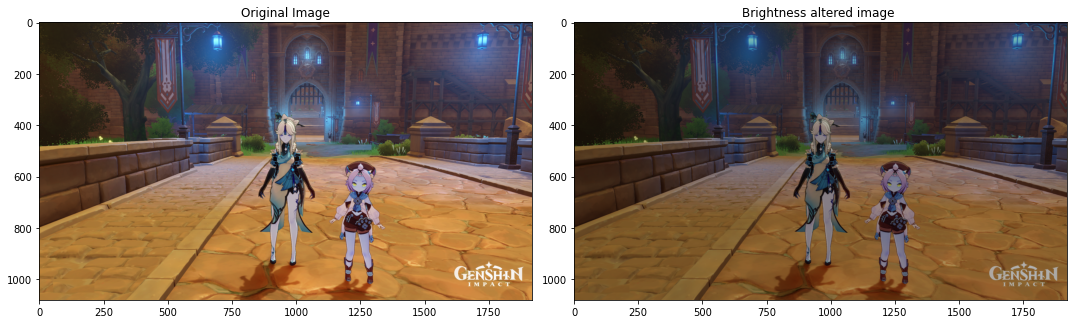

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
 
axs[1].imshow(brightness_altered_image)
axs[1].set_title('Brightness altered image ')

In [25]:
import random

In [28]:
def img_random_flip(image, steering_angle):
    image = cv2.flip(image,1)
    steering_angle = -steering_angle
    return image, steering_angle

In [29]:
random_index = random.randint(0, 1000)
original_image = cv2.imread("image.png") 


In [ ]:
#steering_angle = steerings[random_index]

In [36]:
# Python code to demonstrate
# working of radians()

# for radians
import math


print("180 Degrees is equal to Radians : ", end ="")
print (math.radians(180))

print("1 Degrees is equal to Radians : ", end ="")
print (math.radians(1))


180 Degrees is equal to Radians : 3.141592653589793
1 Degrees is equal to Radians : 0.017453292519943295


In [50]:
grades=5

In [56]:
print(str(grades) + " degrees is equal to Radians : ", end ="")
print (math.radians(grades))

5 degrees is equal to Radians : 0.08726646259971647


In [57]:
steering_angle =math.radians(grades)

In [58]:
flipped_image, flipped_steering_angle = img_random_flip(original_image, steering_angle)

Text(0.5, 1.0, 'Flipped Image - Steering Angle:-0.08726646259971647')

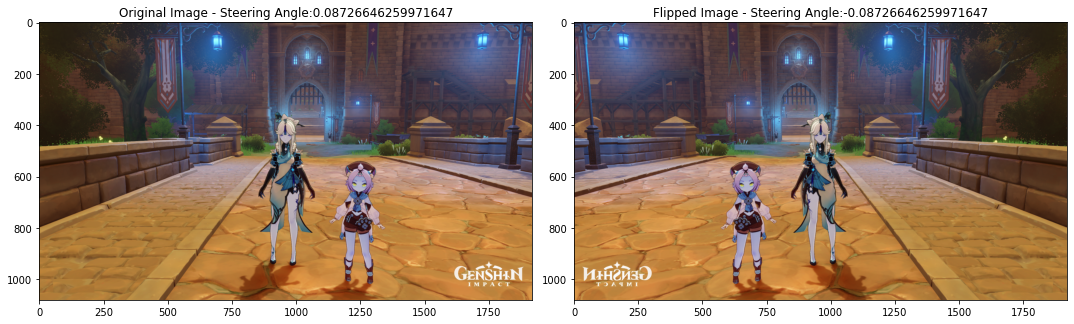

In [59]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image - ' + 'Steering Angle:' + str(steering_angle))
 
axs[1].imshow(flipped_image)
axs[1].set_title('Flipped Image - ' + 'Steering Angle:' + str(flipped_steering_angle))

In [60]:
def random_augment(image, steering_angle):
    image = mpimg.imread(image)
    if np.random.rand() < 0.5:
      image = pan(image)
    if np.random.rand() < 0.5:
      image = zoom(image)
    if np.random.rand() < 0.5:
      image = img_random_brightness(image)
    if np.random.rand() < 0.5:
      image, steering_angle = img_random_flip(image, steering_angle)
    
    return image, steering_angle

In [61]:
def random_augment(image, steering_angle):
    image = mpimg.imread(image)
    if np.random.rand() < 0.5:
      image = pan(image)
    if np.random.rand() < 0.5:
      image = zoom(image)
    if np.random.rand() < 0.5:
      image = img_random_brightness(image)
    if np.random.rand() < 0.5:
      image, steering_angle = img_random_flip(image, steering_angle)
    
    return image, steering_angle

In [62]:
def img_preprocess(img):
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,  (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img = img/255
    return img

In [63]:
original_image = cv2.imread("image.png")
preprocessed_image = img_preprocess(original_image)

Text(0.5, 1.0, 'Preprocessed Image')

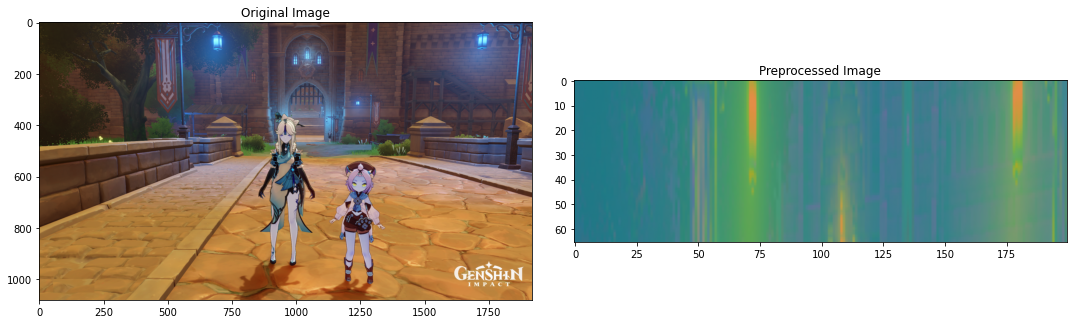

In [65]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

# First Task to Develop
Autowalking

In [6]:
def main(file_name, starting_value):
    file_name = file_name
    starting_value = starting_value
    training_data = []
    for i in list(range(4))[::-1]:
        print(i+1)
        time.sleep(1)

    last_time = time.time()
    paused = False
    print('STARTING!!!')
    while(True):
        
        if not paused:
            screen = grab_screen(region=(0,40,1920,1120))

            # 800x600 windowed mode
            #screen = grab_screen(region=(0,40,800,640))
            last_time = time.time()
            # resize to something a bit more acceptable for a CNN
            screen = cv2.resize(screen, (480,270))

            #screen = cv2.resize(screen, (160,120))

            # run a color convert:
            screen = cv2.cvtColor(screen, cv2.COLOR_BGR2RGB)
            
            keys = key_check()
            #print(keys)
            #print(type(keys))
            output = keys_to_output(keys)
            #print(output)
            #print(type(output))


            gamepad_keys = gamepad_check()
            #print(gamepad_keys)
            #print(type(gamepad_keys))
            output_gamepad = gamepad_keys_to_output(gamepad_keys)
            #print(output_gamepad)
            #print(type(output_gamepad))
            training_data.append([screen,output,output_gamepad])

            #print('loop took {} seconds'.format(time.time()-last_time))
            last_time = time.time()
            cv2.imshow('window',cv2.resize(screen,(640,360)))
            if cv2.waitKey(25) & 0xFF == ord('q'):
                cv2.destroyAllWindows()
                break

            if len(training_data) % 100 == 0:
                print(len(training_data))
                
                if len(training_data) == 500:
                    np.save(file_name,training_data)
                    print('SAVED')
                    training_data = []
                    starting_value += 1
                    #file_name = 'X:/pygta5/phase7-larger-color/training_data-{}.npy'.format(starting_value)
                    file_name = 'training_data-{}.npy'.format(starting_value)
               
        keys = key_check()
        if 'T' in keys:
            if paused:
                paused = False
                print('unpaused!')
                time.sleep(1)
            else:
                print('Pausing!')
                paused = True
                time.sleep(1)

In [16]:
main(file_name, starting_value)

4
3
2
1
STARTING!!!
100
200
300
400
500
SAVED
100
200
300
400
500
SAVED
100
200
300
400
